In [32]:
setwd('/data/import/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.ji/data2/')

###  valcano

In [33]:
diff = read.table('./sample74.pro.txt',header =T,sep = '\t',fill =NA)

diff = diff[!duplicated(diff$GeneName),]

In [34]:
head(diff,3)

,GeneName,Biotype,Gene,CI_normalize,CRTL_normalize,FoldChange,Log2FoldChange,pval,padj,Up.Down,Significant
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,TSPAN6,protein_coding,ENSG00000000003,3.922491,4.90077945,0.8003811,-0.3212410,0.286507903,0.74424720,down,no
2,TNMD,protein_coding,ENSG00000000005,0.000000,0.03036792,NA,NA,NA,NA,,
3,DPM1,protein_coding,ENSG00000000419,349.041250,269.58626190,1.2947294,0.3726506,0.002837602,0.07255005,up,no


In [35]:
padj = 0.05
foldChange = 0.5

diff$group = as.factor(ifelse(diff$padj < padj & abs(diff$Log2FoldChange	) > foldChange, 
                                 ifelse(diff$Log2FoldChange	> foldChange ,'Up(67)','Down(458)'),'NoSignifi(17381)'))
table(diff$group)


       Down(458) NoSignifi(17381)           Up(67) 
             458            17381               67 

In [36]:
table(diff$group)


       Down(458) NoSignifi(17381)           Up(67) 
             458            17381               67 

In [37]:
res = na.omit(diff)

In [38]:
write.csv(res,file = './fig/sample75.diffgene.csv')

In [39]:
library(dplyr)

In [40]:
head(res)

,GeneName,Biotype,Gene,CI_normalize,CRTL_normalize,FoldChange,Log2FoldChange,pval,padj,Up.Down,Significant,group
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,TSPAN6,protein_coding,ENSG00000000003,3.922491,4.900779,0.8003811,-0.32124099,0.286507903,0.74424720,down,no,NoSignifi(17381)
3,DPM1,protein_coding,ENSG00000000419,349.041250,269.586262,1.2947294,0.37265057,0.002837602,0.07255005,up,no,NoSignifi(17381)
4,SCYL3,protein_coding,ENSG00000000457,921.057727,776.287624,1.1864903,0.24670029,0.035645753,0.28546070,up,no,NoSignifi(17381)
5,C1orf112,protein_coding,ENSG00000000460,359.392458,348.190000,1.0321734,0.04568536,0.650595477,0.97070566,up,no,NoSignifi(17381)
6,FGR,protein_coding,ENSG00000000938,9082.397163,11064.956390,0.8208254,-0.28485274,0.043737841,0.31852515,down,no,NoSignifi(17381)
7,CFH,protein_coding,ENSG00000000971,155.161113,116.428708,1.3326706,0.41432019,0.017060114,0.19312746,up,no,NoSignifi(17381)


In [41]:
    top_5 <-
          res %>%
            filter(GeneName  %in% c('FAM200B','BCL2A1','IGJ','TXN')   ) 

In [42]:
rownames(top_5) = top_5$GeneName

In [43]:
library(ggpubr)
library(ggplot2)
    library(dplyr)
    library(ggrepel)
    library(ggplot2)
    library(cowplot)

In [49]:
p=  ggplot(data=res,aes(x=Log2FoldChange,y=-log10(padj)))+
    geom_point(aes(color=group),size=1)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    geom_vline(xintercept = c(-.5,.5),linetype="dashed",color="grey30")+
    #geom_text_repel(data=top_5,aes(x= Log2FoldChange,y= -log10(padj),label= rownames(top_5)))+
    scale_color_manual(values = c("#35987F","grey80","#D27356"))+
    theme_half_open() 

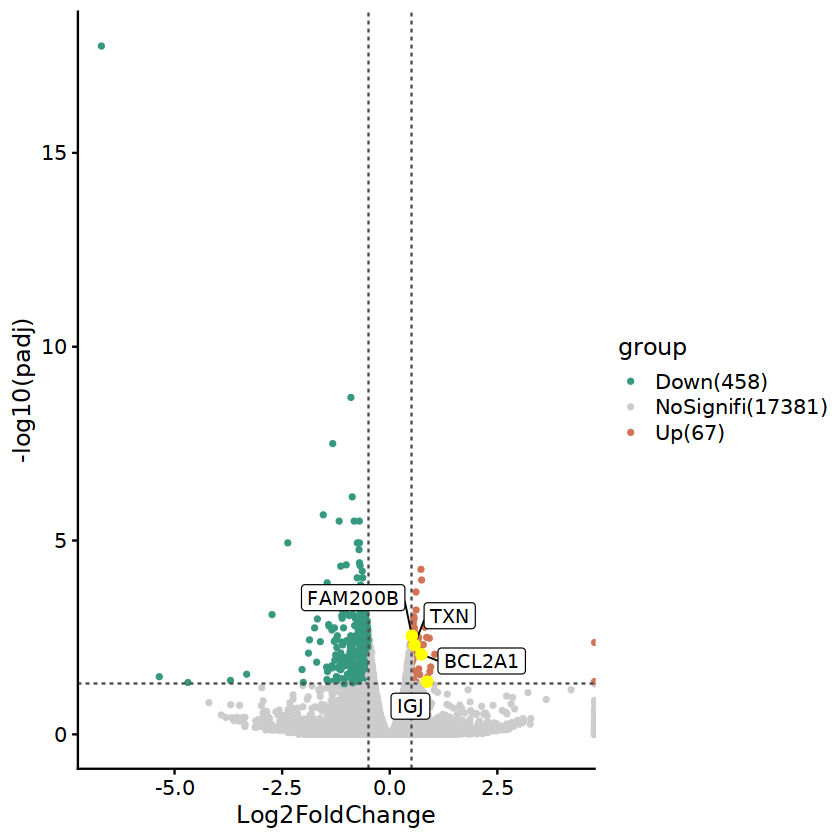

In [51]:
library(ggrepel)
p + geom_label_repel(data = top_5, 
                     aes(x = Log2FoldChange, y = -log10(padj), label = rownames(top_5)),
                     size = 4,color="black",
                     box.padding = unit(0.4, "lines"), 
                     segment.color = "black",   #连线的颜色
                     segment.size = 0.4,  #连线的粗细
                     )+
  #突出表示差异基因
  geom_point(data=top_5,aes(x = Log2FoldChange, y = -log10(padj)),colour="yellow",size=2.5)

In [52]:
library(ggplot2)

In [53]:
ggsave('./fig2/Figure1.74sample.valano.pdf',width = 5,height = 4)

In [37]:
library(clusterProfiler)
library(org.Hs.eg.db)

In [47]:
jiaoji = diff %>%  dplyr::filter(group  != 'NoSignifi') %>%  dplyr::select(GeneName)

In [48]:
gene_symbol <- bitr(geneID = jiaoji$GeneName,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Hs.eg.db,  
                   ont = "ALL",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.5,  
                   readable = TRUE) 

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = jiaoji$GeneName, fromType = "SYMBOL", toType = c("ENTREZID"), :
"7.62% of input gene IDs are fail to map..."


In [49]:
grep('im',BP@result$Description,value = T)

[1] "lymphocyte costimulation"

In [50]:
BP@result

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0030168,BP,GO:0030168,platelet activation,20/452,133/18903,5.599898e-11,2.617392e-07,2.327200e-07,VCL/GP6/PF4V1/VWF/MPL/TLN1/DGKQ/FERMT3/ADRA2A/ADAMTS13/P2RY12/P2RY1/GP5/F2R/GP1BA/PEAR1/FLNA/SRC/PDGFA/ITGB3,20
GO:0042060,BP,GO:0042060,wound healing,35/452,442/18903,6.153678e-10,1.438114e-06,1.278669e-06,ABCC8/TBXA2R/VCL/GP6/PF4V1/VWF/MPL/SDC4/CDKN1A/VIL1/TLN1/THBS1/EMILIN1/ERBB2/ARHGEF19/DGKQ/FERMT3/ADRA2A/CD109/ADAMTS13/P2RY12/P2RY1/CD151/PLEC/GP5/SCRIB/F2R/GP1BA/PEAR1/FLNA/SRC/PDGFA/DDR1/AQP1/ITGB3,35
GO:0007596,BP,GO:0007596,blood coagulation,23/452,225/18903,5.200263e-09,6.486030e-06,5.766918e-06,TBXA2R/VCL/GP6/PF4V1/VWF/MPL/TLN1/THBS1/EMILIN1/DGKQ/FERMT3/ADRA2A/ADAMTS13/P2RY12/P2RY1/GP5/F2R/GP1BA/PEAR1/FLNA/SRC/PDGFA/ITGB3,23
GO:0050878,BP,GO:0050878,regulation of body fluid levels,31/452,390/18903,5.550732e-09,6.486030e-06,5.766918e-06,TBXA2R/VCL/GP6/NEURL1/MLLT6/PF4V1/VWF/MPL/TLN1/THBS1/EMILIN1/CELSR2/DGKQ/FERMT3/ADRA2A/ADAMTS13/P2RY12/P2RY1/SLC29A2/PLEC/GP5/F2R/GP1BA/PEAR1/FLNA/SRC/PDGFA/APRT/DDR1/AQP1/ITGB3,31
GO:0050817,BP,GO:0050817,coagulation,23/452,230/18903,7.926788e-09,6.708339e-06,5.964579e-06,TBXA2R/VCL/GP6/PF4V1/VWF/MPL/TLN1/THBS1/EMILIN1/DGKQ/FERMT3/ADRA2A/ADAMTS13/P2RY12/P2RY1/GP5/F2R/GP1BA/PEAR1/FLNA/SRC/PDGFA/ITGB3,23
GO:0007599,BP,GO:0007599,hemostasis,23/452,231/18903,8.611474e-09,6.708339e-06,5.964579e-06,TBXA2R/VCL/GP6/PF4V1/VWF/MPL/TLN1/THBS1/EMILIN1/DGKQ/FERMT3/ADRA2A/ADAMTS13/P2RY12/P2RY1/GP5/F2R/GP1BA/PEAR1/FLNA/SRC/PDGFA/ITGB3,23
GO:0031589,BP,GO:0031589,cell-substrate adhesion,25/452,369/18903,3.246829e-06,2.167954e-03,1.927591e-03,ITGA2B/PKD1/VCL/ARHGAP6/ITGB5/VWF/NID1/SDC4/LAMA5/TLN1/THBS1/EMILIN1/MINK1/NOTCH1/FERMT3/DAB2/MMP14/ADAMTS13/JAM3/TNXB/LAMB2/FLNA/SRC/DDR1/ITGB3,25
GO:0007160,BP,GO:0007160,cell-matrix adhesion,19/452,238/18903,4.888738e-06,2.856245e-03,2.539571e-03,ITGA2B/PKD1/VCL/ARHGAP6/ITGB5/NID1/SDC4/TLN1/THBS1/EMILIN1/MINK1/FERMT3/MMP14/ADAMTS13/JAM3/TNXB/SRC/DDR1/ITGB3,19
GO:0070527,BP,GO:0070527,platelet aggregation,10/452,71/18903,6.933524e-06,3.585632e-03,3.188090e-03,VCL/GP6/MPL/TLN1/FERMT3/P2RY12/GP1BA/PEAR1/FLNA/ITGB3,10


In [51]:
 BP %>% filter(ONTOLOGY	 == 'BP') %>% head(10) -> bp
 BP %>% filter(ONTOLOGY	 == 'CC') %>% head(10) -> cc
 BP %>% filter(ONTOLOGY	 == 'MF') %>% head(10) -> mf

In [52]:
go = rbind(bp,cc,mf)

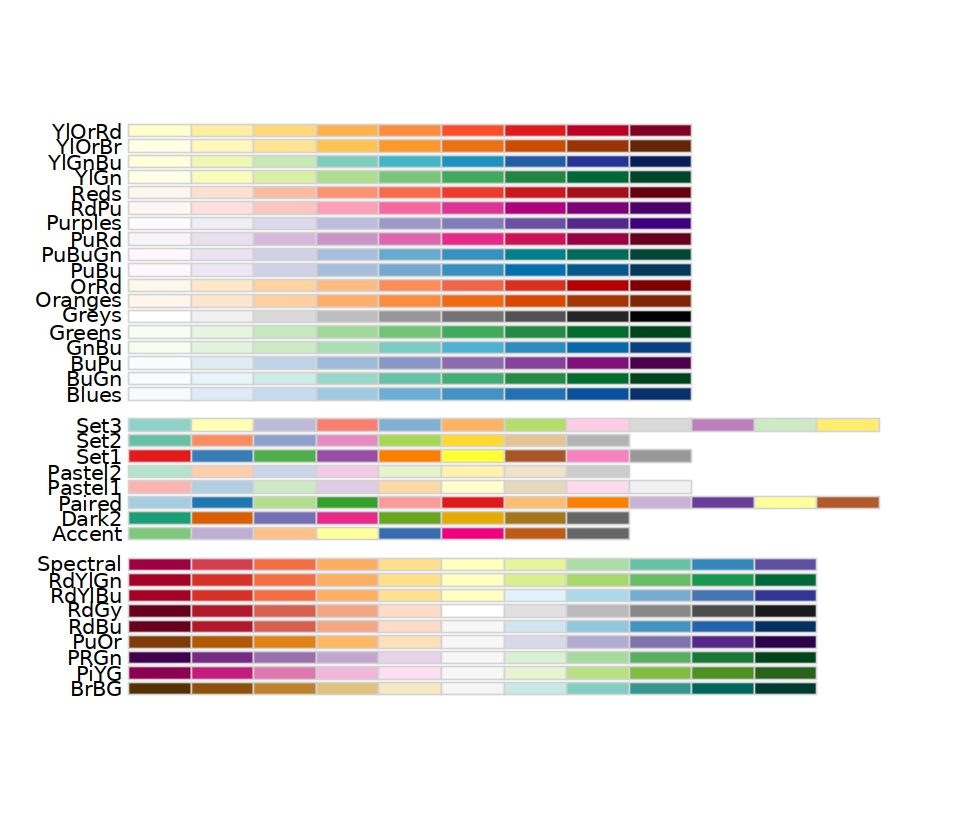

In [53]:
library(ggplot2)
library(RColorBrewer)
display.brewer.all()
color <- brewer.pal(3,"Dark2")
colorl <- rep(color,each=10)
go$Description<- factor(go$Description,levels=go$Description)

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


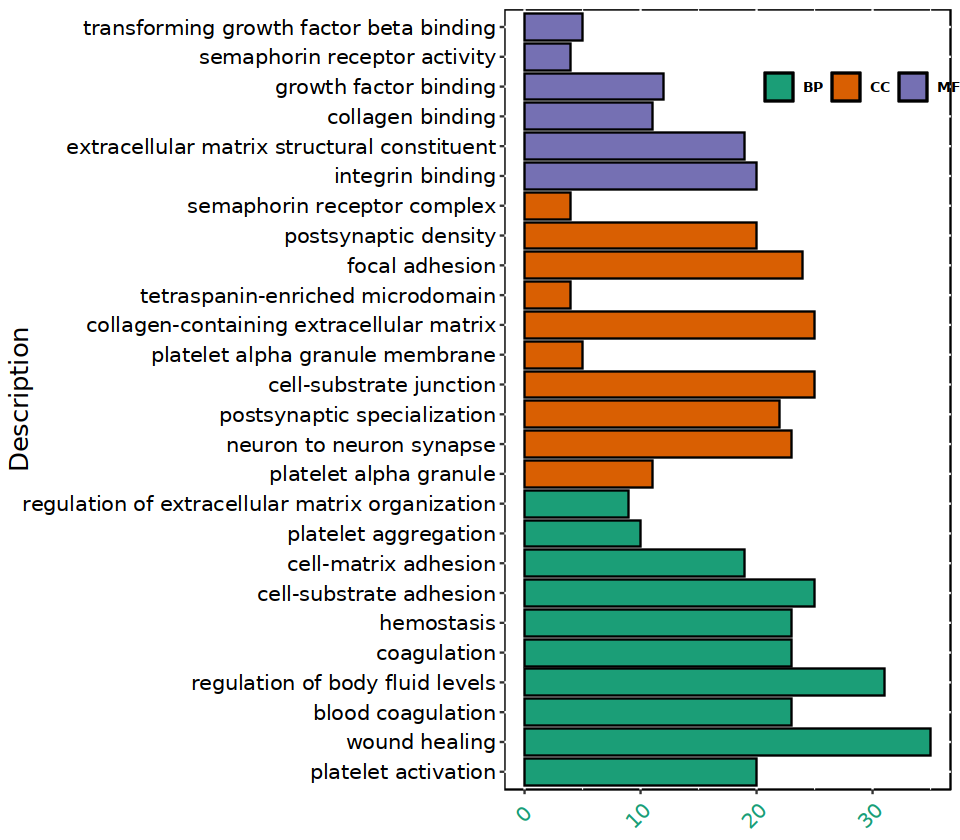

In [54]:
options(repr.plot.width = 8)

ggplot(go) +
  aes(x = Description, y = Count, fill = ONTOLOGY) + coord_flip()+
  geom_bar(stat = "identity",colour="black") +
  #scale_fill_hue() +
  scale_fill_manual(values =color)+
  theme(
    axis.title=element_text(size=15,face="plain",color="black"),
    axis.text = element_text(size=12,face="plain",color="black"),
    axis.text.x = element_text(angle = 45,colour = colorl,hjust=0.7,vjust=0.6),
    axis.title.x = element_blank(),
    legend.title = element_blank(),
    legend.text = element_text(size = 8, face = "bold"),
    legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"),
    legend.direction = "horizontal",
    legend.position = c(0.8,0.9),
    legend.background = element_blank(),
    panel.background = element_rect(fill = "transparent",colour = "black"),
    
    plot.background = element_blank()
  )
ggsave('./fig2/Figure1.74sample.GO.pdf',width = 8,height = 8)

In [56]:
write.csv(BP@result,file = './fig2/74sample.GO.csv')

In [18]:
load('cohort1.rda')

In [19]:
jiaoji = res  %>% dplyr::filter(group != 'NoSignifi') %>%  dplyr::select(GeneName)

In [20]:
forplot = expr[jiaoji$GeneName,]
library(pheatmap)
#forplot = na.omit(forplot)
#forplot = forplot[rowSums(forplot) >100,]
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 
#
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

Warning message:
"package 'pheatmap' was built under R version 4.2.3"


[1] 525  74

In [43]:
library(pheatmap)
annotation_col = data.frame( c(rep('Con',31),rep('IS',43)))
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(dat)
head(dat,2)

,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
PLXND1,1.4663761,0.5326898,1.3106524,0.08780758,2,1.2319745,1.699936,0.1926703,1.6124870,2.0000000,...,-2.000000,-1.608802,-0.7480426,-0.8926264,-0.7559422,0.05667612,-0.17235714,-1.3392203,0.01357865,-0.2453016
ARHGAP33,-0.1168865,-0.2532862,0.6671126,0.21702598,2,0.3662354,1.857828,0.8709468,0.5464573,0.5560284,...,-1.558136,-1.784292,-1.4084486,-1.0253310,-0.7981151,0.46276153,-0.08493505,-0.6728667,0.12585997,-0.9968721


In [ ]:

groupcolor <- c("#85B22E","#E29827")

names(groupcolor) <- c("Con","IS")
ann_colors <- list(group=groupcolor)

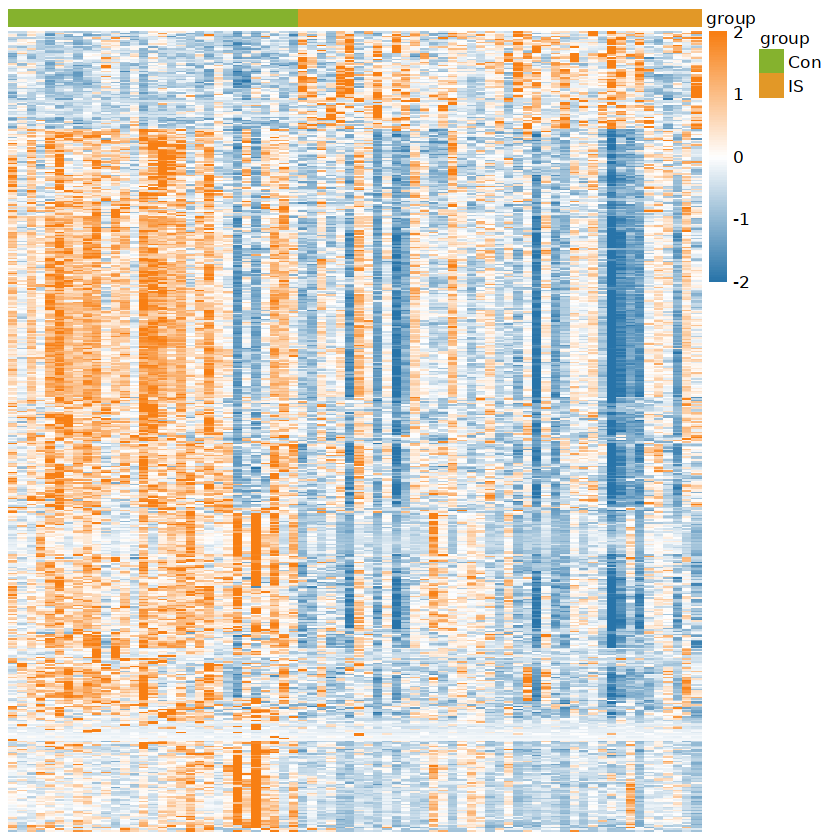

In [52]:
 x  = pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = F,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="none",
        annotation_col = annotation_col,
               treeheight_col = 0,
               treeheight_row = 0,
               annotation_colors = ann_colors,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#
         # angle_col = 45 #
)

In [54]:
pdf('./fig2/cohort1.heat.pdf',height = 6,width = 7)
x
dev.off()

png 
  2

In [55]:
table(res$group)


     Down NoSignifi        Up 
      458     17381        67 

In [56]:
df = data.frame(type = c('Up','Down'),
               num = c(67,458))

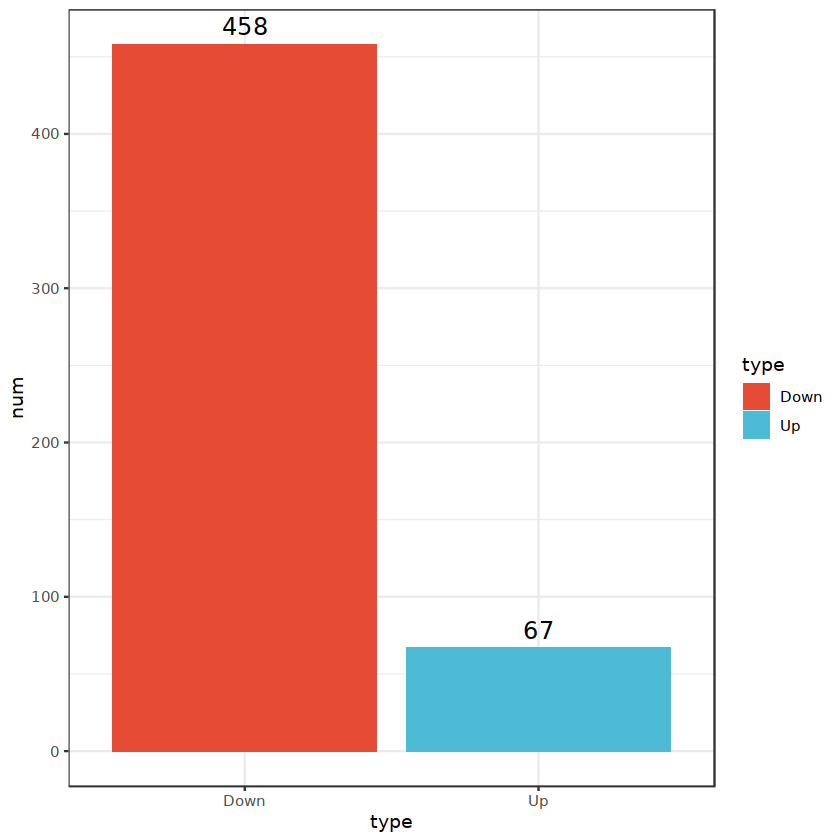

In [59]:
ggplot(df,aes(type,num,fill=type))+
  geom_bar(stat="summary",fun=mean,position = position_dodge(0.5)) +
ggsci::scale_fill_npg() + theme_bw()+
geom_text(aes(label=num),size=5,vjust=-0.5)

In [63]:
ggsave(file = './fig2/cohort.diff.gene.pdf',width = 4,height = 4.8)

In [54]:
library(GSVA)
library(GSEABase)
library(limma)

In [55]:
keggSet <- getGmt("/import/DB/kegg.gmt")

Warning message in getGmt("/import/DB/kegg.gmt"):
"28 record(s) contain duplicate ids: Alzheimer disease, Amyotrophic lateral sclerosis, ..., Spliceosome, Starch and sucrose metabolism"


In [56]:
keggEs <- gsva(expr=as.matrix(expr), gset.idx.list=keggSet, kcdf="Gaussian", parallel.sz=8)

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."


Setting parallel calculations through a MulticoreParam back-end
with workers=8 and tasks=100.
Estimating GSVA scores for 346 gene sets.
Estimating ECDFs with Gaussian kernels
Estimating ECDFs in parallel on 8 cores


iteration: 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100




  |======================================================================| 100%



In [60]:
grouP <- c(rep('con',31),rep('CI',43)) %>% as.factor()
desigN <- model.matrix(~ grouP + 0)
rownames(desigN) <- colnames(expr)
desigN

,grouPCI,grouPcon
C10,0,1
C11,0,1
C12,0,1
C13,0,1
C14,0,1
C15,0,1
C16,0,1
C17,0,1
C18,0,1
C19,0,1


In [61]:
 comparE <- makeContrasts(grouPCI - grouPcon, levels=desigN)

In [189]:
fiT <- lmFit(keggEs, desigN)
fiT2 <- contrasts.fit(fiT, comparE)
fiT3 <- eBayes(fiT2)
keggDiff <- topTable(fiT3, coef=1, number=500)
head(keggDiff, n=3)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Other types of O-glycan biosynthesis,-0.2019470,-0.015342304,-6.084497,3.969585e-08,1.373476e-05,8.460166
Mannose type O-glycan biosynthesis,-0.3145999,0.009162888,-5.512063,4.331886e-07,7.494163e-05,6.205418
Fructose and mannose metabolism,-0.2740507,0.007891889,-5.219633,1.418093e-06,1.635534e-04,5.089255


In [190]:
library(tidyverse)  # ggplot2 stringer dplyr tidyr readr purrr  tibble forcats
library(ggthemes)
library(ggprism)

degs <- keggDiff  #
Diff <- rbind(subset(degs,logFC>0)[1:20,], subset(degs,logFC<0)[1:20,]) #   
dat_plot <- data.frame(id  = row.names(Diff),
                       p   = Diff$P.Value,
                       lgfc= Diff$logFC)
dat_plot$group <- ifelse(dat_plot$lgfc>0 ,1,-1)    # 
dat_plot$lg_p <- -log10(dat_plot$p)*dat_plot$group # 

# 
dat_plot$id[1:10]
dat_plot$id <- str_replace(dat_plot$id, "KEGG_","");dat_plot$id[1:10]

[1] "Virion - Adenovirus"                      
 [2] "SNARE interactions in vesicular transport"
 [3] "Protein export"                           
 [4] "Herpes simplex virus 1 infection"         
 [5] "Basal transcription factors"              
 [6] "Caffeine metabolism"                      
 [7] "Spliceosome"                              
 [8] "Oxidative phosphorylation"                
 [9] "Prion disease"                            
[10] "mRNA surveillance pathway"

[1] "Virion - Adenovirus"                      
 [2] "SNARE interactions in vesicular transport"
 [3] "Protein export"                           
 [4] "Herpes simplex virus 1 infection"         
 [5] "Basal transcription factors"              
 [6] "Caffeine metabolism"                      
 [7] "Spliceosome"                              
 [8] "Oxidative phosphorylation"                
 [9] "Prion disease"                            
[10] "mRNA surveillance pathway"

In [191]:
head(dat_plot,4)

,id,p,lgfc,group,lg_p
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Virion - Adenovirus,2.108224e-05,0.4287959,1,4.676083
2,SNARE interactions in vesicular transport,6.418528e-05,0.1799788,1,4.192565
3,Protein export,7.417691e-05,0.2242579,1,4.129731
4,Herpes simplex virus 1 infection,1.030541e-04,0.2368889,1,3.986935


In [222]:
# 
p_cutoff=0.0005
dat_plot$threshold = factor(ifelse(dat_plot$lg_p >-3.5, ifelse(dat_plot$lg_p >= 3.5 ,'Up','Not'),'Down'),levels=c('Up','Down','Not'))

table(dat_plot$threshold)


  Up Down  Not 
   5   16   19 


  Up Down  Not 
   5   16   19 

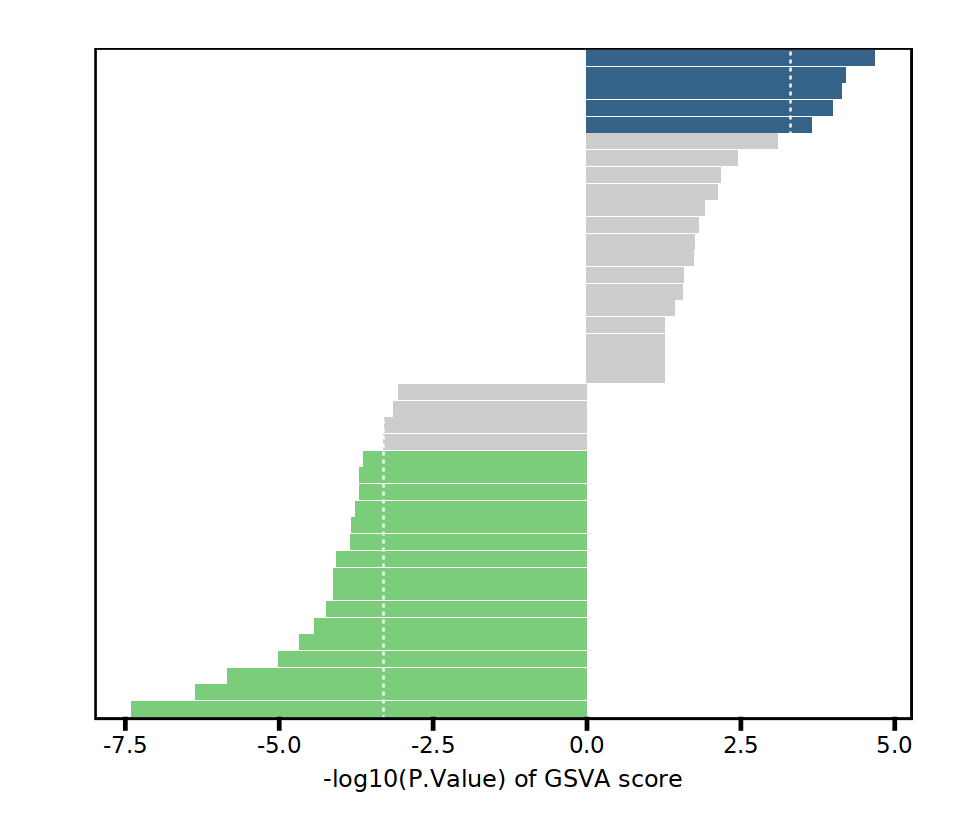

In [223]:

table(dat_plot$threshold)

# 
dat_plot <- dat_plot %>% arrange(lg_p)
# 
dat_plot$id <- factor(dat_plot$id,levels = dat_plot$id)
# 
p <- ggplot(data = dat_plot,aes(x = id, y = lg_p, 
                                fill = threshold)) +
  geom_col()+
  coord_flip() + #
  scale_fill_manual(values = c('Up'= '#36638a','Not'='#cccccc','Down'='#7bcd7b')) +
  geom_hline(yintercept = c(-log10(p_cutoff),log10(p_cutoff)),color = 'white',size = 0.5,lty='dashed') +
  xlab('') + 
  ylab('-log10(P.Value) of GSVA score') +
  guides(fill="none")+ # 
  theme_prism(border = T) +
  theme(
    plot.margin=unit(c(2,2,2,2),'lines'),#
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank()
  )

In [ ]:
df = dat_plot %>% dplyr::select(id,lg_p)

colnames(df)[2] = 'score'

df$group<-cut(df$score, breaks = c(-Inf,-3.5,3.5,Inf),labels = c(1,2,3))
df<-df[order(df$score,decreasing = F),]
df$index<-seq(1,nrow(df))

options(repr.plot.width = 8,repr.plot.height = 8)

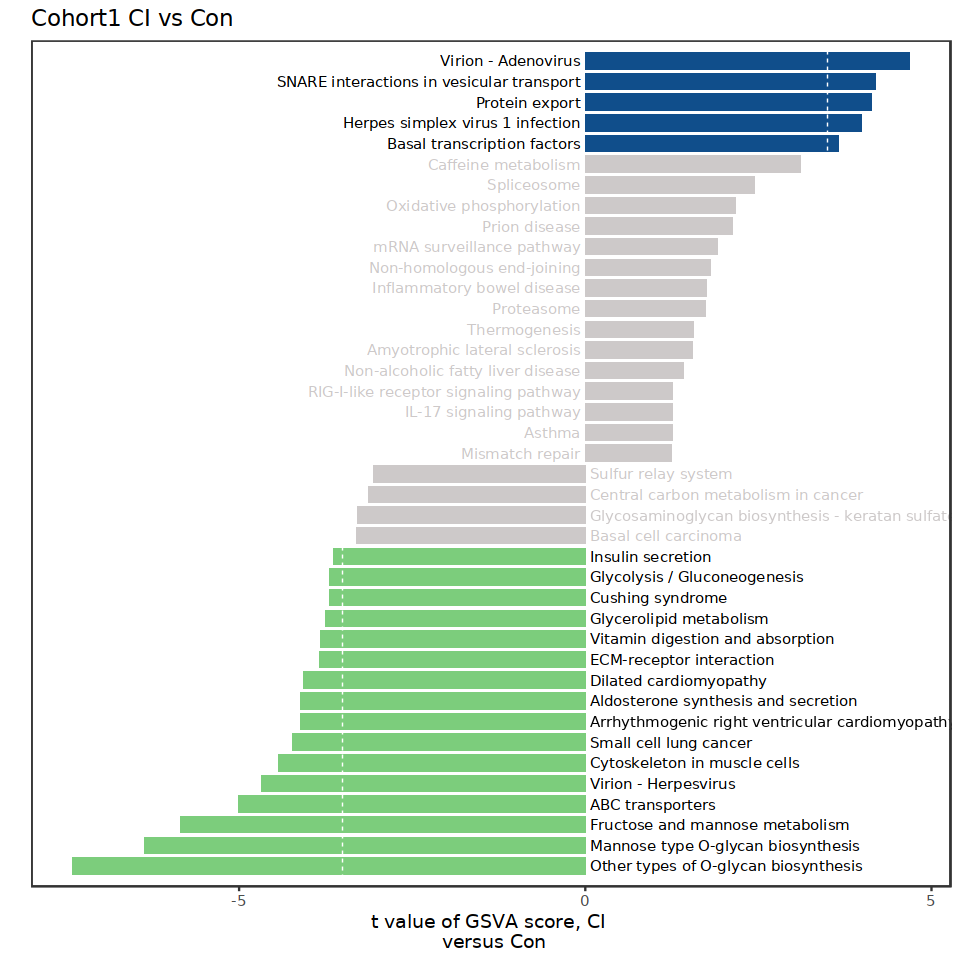

In [251]:
ggplot(df,aes(x=index,y=score,fill=group)) +
geom_bar(stat = 'identity',width = 0.8) +
scale_fill_manual(values = c("palegreen3","snow3","dodgerblue4")) + 
scale_x_discrete(expand = expand_scale(add = .6)) +
scale_y_continuous(breaks=seq(-30, 20, 5)) +
coord_flip() + 
geom_hline(yintercept = c(-3.5,3.5),color="white",linetype = 2,#
           size = 0.3) +
geom_text(data = subset(df, score > 0),
          aes(x=index, y=0, label=paste0(id," "), color = group),#
          size = 3, #
          hjust = "inward" ) +
geom_text(data = subset(df, score < 0),
          aes(x=index, y=0, label=paste0(" ",id), color = group),
          size = 3, hjust = "outward") +scale_colour_manual(values = c("black","snow3","black")) +
labs(x = "", y = "t value of GSVA score, CI \n versus Con",
     title = "Cohort1 CI vs Con") +
theme_bw() + #
theme(panel.grid =element_blank()) + #
theme(panel.border = element_rect(size = 0.6)) + #
theme(axis.line.y = element_blank(), axis.ticks.y = element_blank(), axis.text.y = element_blank()) + #
guides(fill=FALSE,color=FALSE)

In [252]:
ggsave('./fig/Cohort1.gsva.pdf',width = 7,height = 8)

### pca

In [22]:
library(openxlsx)
data<- read.xlsx("./res/CI-CTR/bulk/74-mRNA_FPKM.genename.xlsx", sheet = 1)
library(dplyr)

Warning message:
"package 'openxlsx' was built under R version 4.2.3"


In [23]:
data = data[!duplicated(data$Gene_name),]

In [24]:

expr = data %>%  tibble::remove_rownames() %>%  dplyr::filter(Gene_name %in%  diff$GeneName) %>%  
tibble::column_to_rownames(.,'Gene_name')  
Group = c(rep('con',31),rep('CI',43))
head(expr,2)

,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,7.70851,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,20.41526,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


In [25]:
save(expr,file = 'cohort1.rda')

In [26]:
library(tinyarray)




Attaching package: 'tinyarray'


The following object is masked from 'package:dplyr':

    union_all




In [72]:
#cg=names(tail(sort(apply(expr,1,sd)),3000))
cg = jiaoji$GeneName
n=expr[cg,]

In [73]:
library(edgeR)

In [74]:
#n = cpm(log2(n+1))

In [75]:
n = n [which(rowSums(n) > 0),]

In [76]:
pca.res <- prcomp(t(n), scale. = T, center = T)  # 
pca.res

Standard deviations (1, .., p=74):
 [1] 1.499394e+01 9.334159e+00 4.479637e+00 3.923678e+00 3.765535e+00
 [6] 3.480427e+00 3.138409e+00 2.824178e+00 2.594386e+00 2.534456e+00
[11] 2.431726e+00 2.263416e+00 2.219487e+00 2.123895e+00 2.094430e+00
[16] 2.054644e+00 1.965990e+00 1.907574e+00 1.861571e+00 1.824408e+00
[21] 1.793624e+00 1.774047e+00 1.731244e+00 1.648084e+00 1.632605e+00
[26] 1.597510e+00 1.580413e+00 1.530926e+00 1.522987e+00 1.483572e+00
[31] 1.462165e+00 1.441608e+00 1.417173e+00 1.378495e+00 1.348478e+00
[36] 1.323400e+00 1.304873e+00 1.290281e+00 1.250682e+00 1.249403e+00
[41] 1.222605e+00 1.198969e+00 1.174786e+00 1.164174e+00 1.161331e+00
[46] 1.137511e+00 1.129500e+00 1.081871e+00 1.073196e+00 1.059045e+00
[51] 1.032561e+00 1.016780e+00 9.967448e-01 9.786358e-01 9.668965e-01
[56] 9.516378e-01 9.391550e-01 9.263282e-01 9.184530e-01 9.018248e-01
[61] 8.787449e-01 8.718556e-01 8.344441e-01 8.197450e-01 8.088940e-01
[66] 7.937741e-01 7.746601e-01 7.523215e-01 7.289227e-0

In [77]:
tmp <- as.data.frame(pca.res$x)
head(tmp)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C10,-11.861712,1.2841058,0.2325549,-6.62099453,2.6369077,-2.7718663,0.2280362,-4.7099625,-1.3001076,2.1083803,...,0.12161427,-0.02388885,-0.07713885,-0.1968286,0.3199583,6.742603e-05,0.1206033,-0.13552184,0.08472555,2.269018e-15
C11,1.749931,0.1888214,0.8430295,1.43457335,-1.9374682,1.5065644,-1.1834512,-0.4495708,-0.3246242,0.4282764,...,0.59731691,1.01277244,1.03374174,0.2137055,-0.4523836,5.198342e-01,0.6656912,0.57828875,0.09250341,3.441691e-15
C12,-11.658535,5.0796404,2.9158058,-0.45211374,0.8122902,-0.4853914,-1.5942061,-1.6409147,-1.3239014,0.5656242,...,-0.66497404,0.05476466,-1.18762737,0.9322233,0.3744397,1.028899e-01,0.1604666,0.75130681,0.47534916,1.554312e-15
C13,-4.165184,-4.5550020,-0.5512364,3.81855610,-5.2360698,1.3783453,-0.2340505,-1.5963299,-1.3099037,1.6843183,...,0.47366728,-0.13793080,-0.23140996,-0.5136701,-0.2875376,4.741629e-01,-0.1423219,-0.07483662,-0.14532136,3.275158e-15
C14,-20.266129,-0.7007710,-4.0762536,0.08230007,-1.3458615,5.4222341,-2.6999890,1.5799599,-1.0564453,-2.7544154,...,-0.05333749,-0.11588764,-0.38108728,-0.5265399,-0.4187054,1.082348e-01,-0.6853798,-0.18817552,-0.06815028,5.467848e-15
C15,-27.260411,2.9190917,2.6378155,-0.35516622,5.6760433,-3.7102090,2.1815398,-1.4129065,-1.5746465,3.7619675,...,-0.42787801,-0.83469285,0.15015008,0.2426672,0.3437498,4.418512e-01,-0.2581153,0.22199563,0.26363412,2.609024e-15


In [78]:
tmp$group <- Group
head(tmp)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C10,-11.861712,1.2841058,0.2325549,-6.62099453,2.6369077,-2.7718663,0.2280362,-4.7099625,-1.3001076,2.1083803,...,-0.02388885,-0.07713885,-0.1968286,0.3199583,6.742603e-05,0.1206033,-0.13552184,0.08472555,2.269018e-15,con
C11,1.749931,0.1888214,0.8430295,1.43457335,-1.9374682,1.5065644,-1.1834512,-0.4495708,-0.3246242,0.4282764,...,1.01277244,1.03374174,0.2137055,-0.4523836,5.198342e-01,0.6656912,0.57828875,0.09250341,3.441691e-15,con
C12,-11.658535,5.0796404,2.9158058,-0.45211374,0.8122902,-0.4853914,-1.5942061,-1.6409147,-1.3239014,0.5656242,...,0.05476466,-1.18762737,0.9322233,0.3744397,1.028899e-01,0.1604666,0.75130681,0.47534916,1.554312e-15,con
C13,-4.165184,-4.5550020,-0.5512364,3.81855610,-5.2360698,1.3783453,-0.2340505,-1.5963299,-1.3099037,1.6843183,...,-0.13793080,-0.23140996,-0.5136701,-0.2875376,4.741629e-01,-0.1423219,-0.07483662,-0.14532136,3.275158e-15,con
C14,-20.266129,-0.7007710,-4.0762536,0.08230007,-1.3458615,5.4222341,-2.6999890,1.5799599,-1.0564453,-2.7544154,...,-0.11588764,-0.38108728,-0.5265399,-0.4187054,1.082348e-01,-0.6853798,-0.18817552,-0.06815028,5.467848e-15,con
C15,-27.260411,2.9190917,2.6378155,-0.35516622,5.6760433,-3.7102090,2.1815398,-1.4129065,-1.5746465,3.7619675,...,-0.83469285,0.15015008,0.2426672,0.3437498,4.418512e-01,-0.2581153,0.22199563,0.26363412,2.609024e-15,con


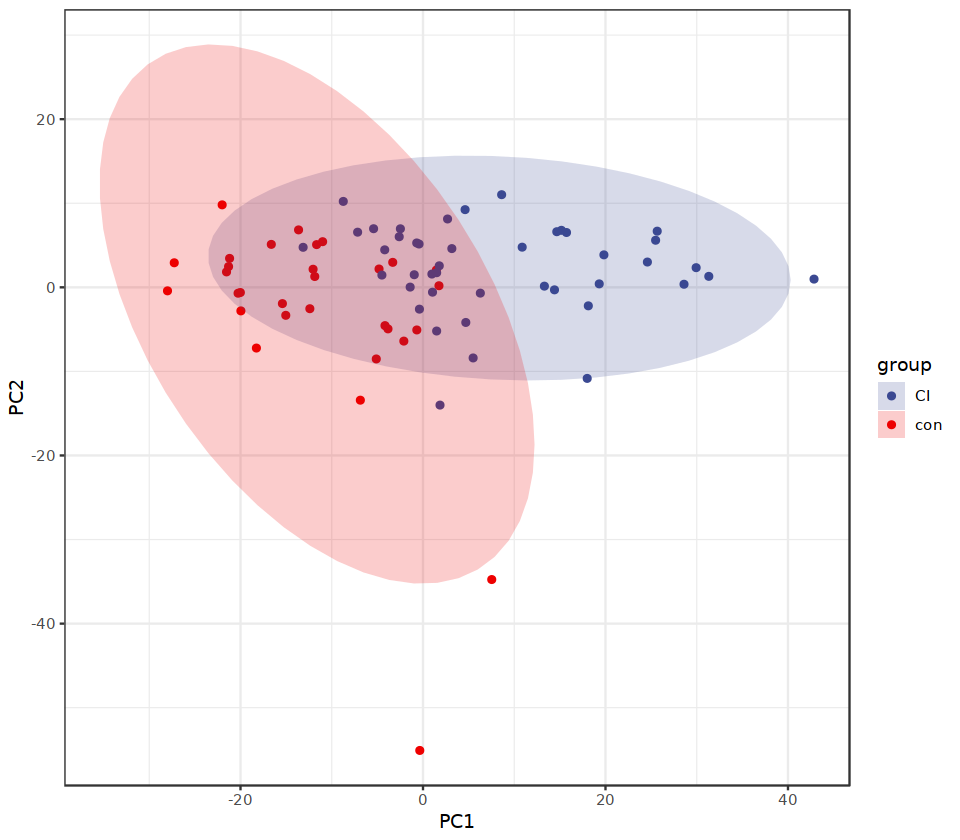

In [79]:
library(ggplot2)
library(ggsci)

ggplot(tmp, aes(PC1, PC2))+
  geom_point(aes(color = group))+
  stat_ellipse(aes(fill=group), alpha = 0.2,
               geom ="polygon",type = "norm")+
  scale_fill_aaas()+
  scale_color_aaas()+
  theme_bw()
ggsave('Figure1.74sample.pca.pdf',width = 8,height = 8)